In [1]:
import pymysql
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas, alminer, glob
import matplotlib.pyplot as plt

from salvage_post_processing_tools import *

In [2]:
fpath = '/arc/projects/salvage/ALMA_reduction/samples/'
file  =  'salvage-AGN-July8-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.txt'

objID_sample, year_sample, muid_sample, proj_sample, name_sample = np.loadtxt(fpath+file, unpack = True, dtype = str, usecols = [0,9,10,11,12])
z_sample, mass_sample, rpetro_sample, ra_sample, dec_sample, res_sample, mrs_sample, sens_sample = np.loadtxt(fpath+file, unpack = True, dtype = float, usecols = [1,2,3,4,5,6,7,8])
K03, K01, WISE, LERG = np.loadtxt(fpath+file, unpack = True, dtype = bool, usecols = [13,14,15,16])
AGN = K03|WISE|LERG

print(len(objID_sample))

262


# Plot Moments and Extract Masses

587722982291865751
'resolution' from archive:  2.6683100162968527
'BMAJ' from header:  3.46292366945508


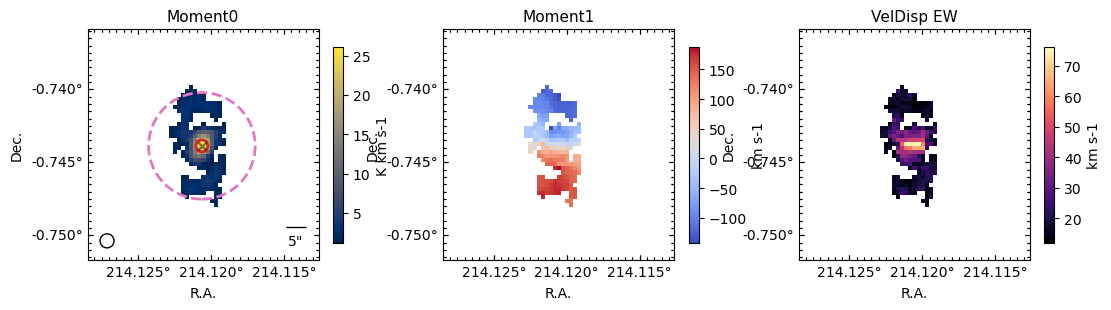

'BMAJ' from header:  3.46292366945508


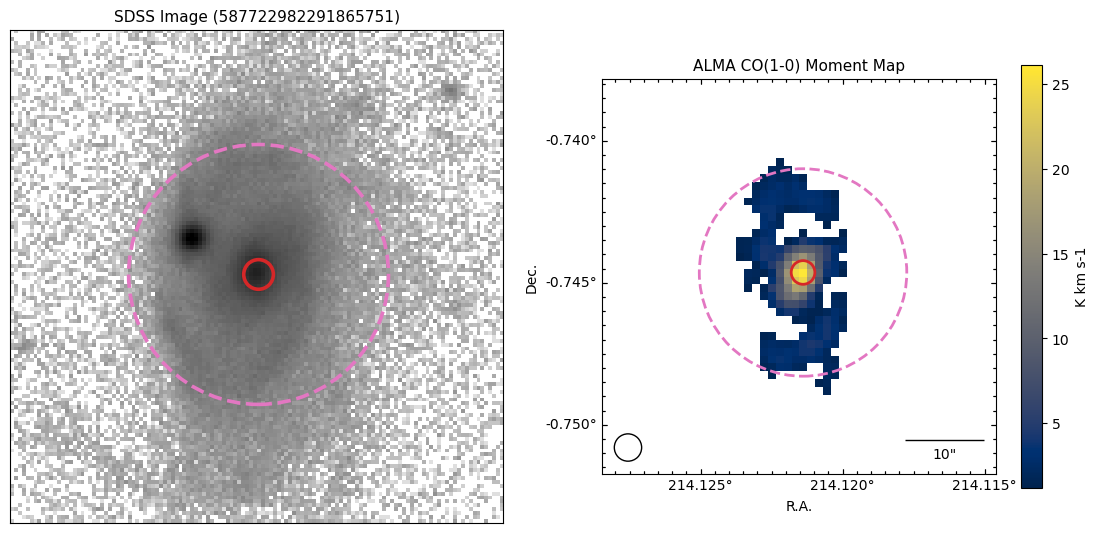

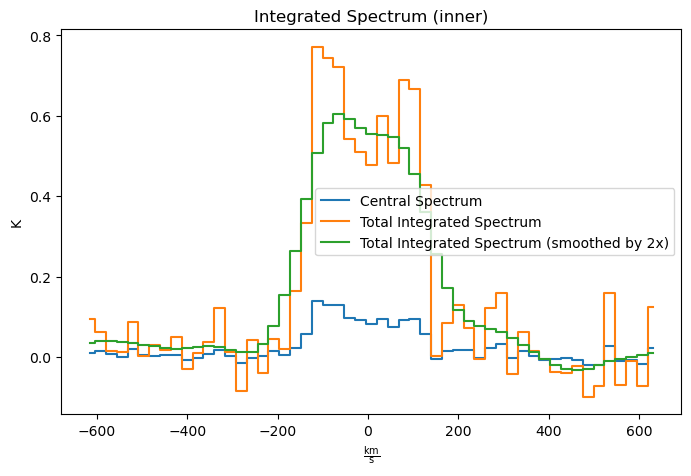

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


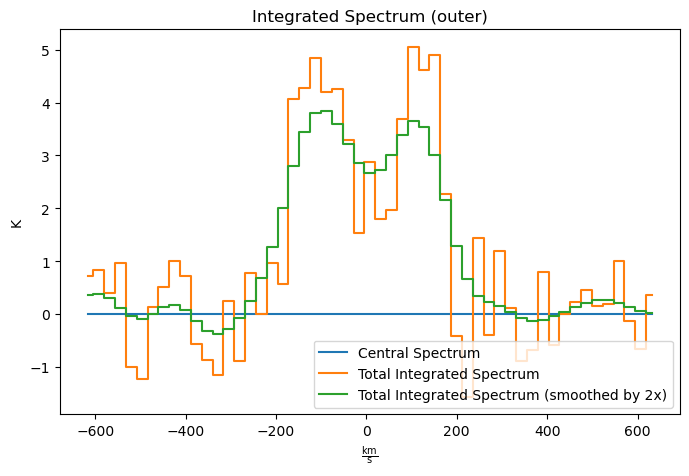

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.632097160769007
Inner log10(MH2):  8.804283349258288
Outer log10(MH2):  9.553892116653747
Inner (stacked) log10(MH2):  8.867104380069748
Outer (stacked) log10(MH2):  9.710204287232884

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4203703703703704

587722982815236212
'resolution' from archive:  1.7362307625735327
/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/587722982815236212/587722982815236212_12m_co10_MOMENTTYPE.fits
/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/587722982815236212/587722982815236212_12m_co10_MOMENTTYPE.fits
587722982815236212 failed.
587722984438235345
'resolution' from archive:  1.0416516967691931
'BMAJ' from header:  1.3219411196322


/arc/projects/salvage/ALMA_reduction/salvage_post_processing_tools.py:634: RuntimeWarning: All-NaN slice encountered
  out = axes[1].imshow(moment_1 - np.nanmedian(moment_1), origin = 'lower', cmap = 'coolwarm')


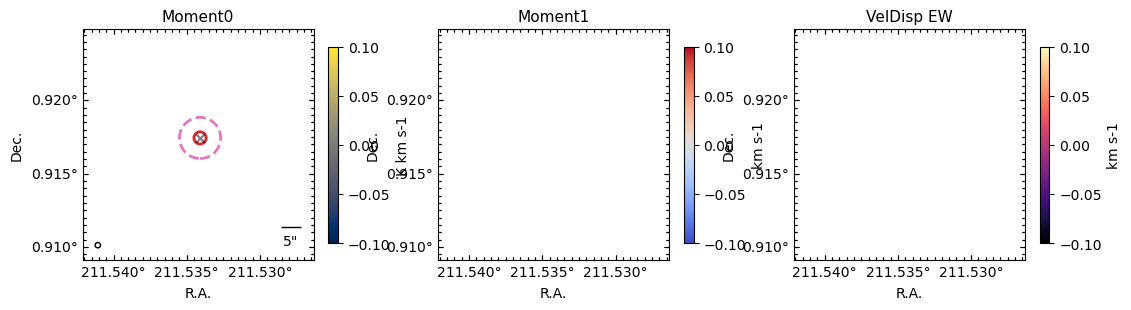

'BMAJ' from header:  1.3219411196322


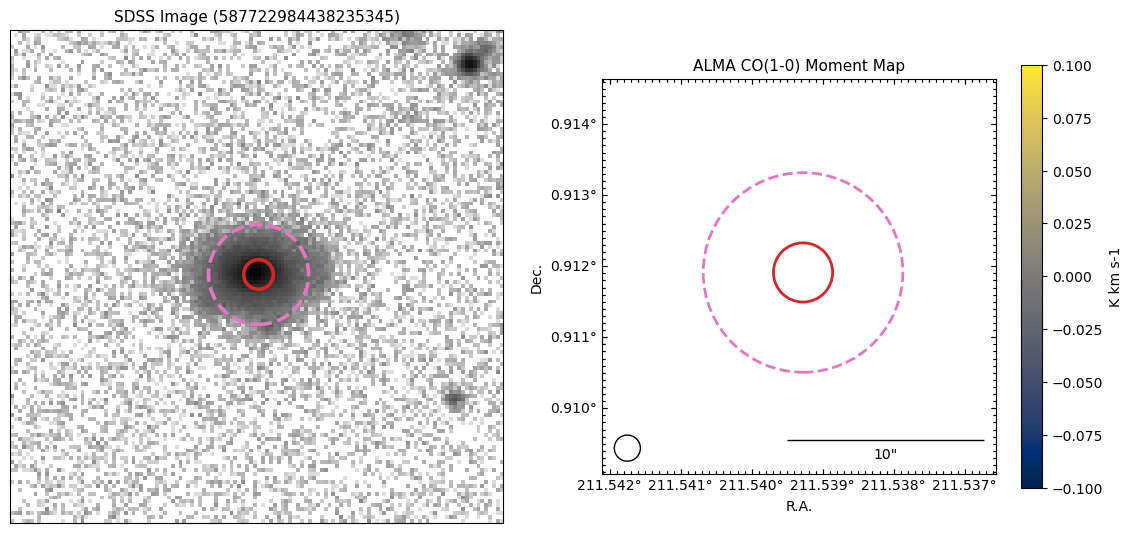

/tmp/ipykernel_29119/4010448528.py:34: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_29119/4010448528.py:35: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


In [ ]:
# wipe file
#outfile = '/arc/projects/salvage/ALMA_reduction/salvage-AGN-July21-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'
#out = open(outfile, 'w')
#out.write('#objID M_H2 M_H2_err M_H2_inner M_H2_inner_err M_H2_outer M_H2_outer_err M_H2_inner_stacked  M_H2_outer_stacked f_inner f_outer \n')
#out.close()

rerun_targets = ['588017992295972989', '588848899376939030']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    #if ID not in rerun_targets:
    #   continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'
    
    try:
        
        demo_PHANGS_moments_annuli_wcs2(imagename, Z, RA, DEC, 2*R, ID)

        demo_image_and_moment_separate(imagename, Z, RA, DEC, 2*R, ID)

        M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
        M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))
        M_H2_inner_stacked, M_H2_inner_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))
        M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))
        M_H2_outer_stacked, M_H2_outer_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))

        print('Total log10(MH2): ', M_H2)
        print('Inner log10(MH2): ', M_H2_inner)
        print('Outer log10(MH2): ', M_H2_outer)
        print('Inner (stacked) log10(MH2): ', M_H2_inner_stacked)
        print('Outer (stacked) log10(MH2): ', M_H2_outer_stacked)
        print()

        f_inner, f_outer = mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

        print('Fraction of pixels covered (inner): ', f_inner)
        print('Fraction of pixels covered (outer): ', f_outer)
        print()

        # output to file
        #out = open(outfile, 'a')
        #out.write(f'{ID} {M_H2} {M_H2_err} {M_H2_inner} {M_H2_inner_err} {M_H2_outer} {M_H2_outer_err} {M_H2_inner_stacked} {M_H2_outer_stacked} {f_inner} {f_outer}\n')
        #out.close()

        mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

    except:

        print(ID, 'failed.')

        

In [15]:
rerun_targets = ['587724197746311240', '588848899376939030']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    if ID not in rerun_targets:
       continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'
    
    try:
        
        #demo_PHANGS_moments_annuli_wcs2(imagename, Z, RA, DEC, 2*R, ID)

        #demo_image_and_moment_separate(imagename, Z, RA, DEC, 2*R, ID)

        M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
        M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
        M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
        M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))
        M_H2_outer_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35, view = False))

        print('Total log10(MH2): ', M_H2)
        print('Inner log10(MH2): ', M_H2_inner)
        print('Outer log10(MH2): ', M_H2_outer)
        print('Inner (stacked) log10(MH2): ', M_H2_inner_stacked)
        print('Outer (stacked) log10(MH2): ', M_H2_outer_stacked)
        print()

        f_inner, f_outer = mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

        print('Fraction of pixels covered (inner): ', f_inner)
        print('Fraction of pixels covered (outer): ', f_outer)
        print()

    except:

        print(ID, 'failed.')

587724197746311240
'resolution' from archive:  1.7412283477228174
'BMAJ' from header:  1.97917576900776

'BMAJ' from header:  1.97917576900776
'BMAJ' from header:  1.97917576900776
Total log10(MH2):  9.96338526812717
Inner log10(MH2):  9.673080888159047
Outer log10(MH2):  9.651358062460515
Inner (stacked) log10(MH2):  9.681940707558063
Outer (stacked) log10(MH2):  9.846568915014235

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.1221476510067114

588848899376939030
'resolution' from archive:  1.505813204551398
'BMAJ' from header:  1.7547375467556001

'BMAJ' from header:  1.7547375467556001
'BMAJ' from header:  1.7547375467556001
Total log10(MH2):  9.46655755351427
Inner log10(MH2):  8.989733907260945
Outer log10(MH2):  9.290317371384866
Inner (stacked) log10(MH2):  9.01966504788928
Outer (stacked) log10(MH2):  9.459314212102994

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.19351179673321234



In [25]:
##########################################################################

# wipe file
outfile = '/arc/projects/salvage/ALMA_reduction/salvage-AGN-July23-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'
out = open(outfile, 'w')
out.write('#objID M_H2 M_H2_err M_H2_inner M_H2_inner_err M_H2_outer M_H2_outer_err M_H2_inner_stacked  M_H2_outer_stacked f_inner f_outer \n')
out.close()

rerun_targets = ['588017992295972989', '588848899376939030']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    #if ID not in rerun_targets:
    #   continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'
    
    try:
        
        #demo_PHANGS_moments_annuli_wcs2(imagename, Z, RA, DEC, 2*R, ID)

        #demo_image_and_moment_separate(imagename, Z, RA, DEC, 2*R, ID)

        M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
        M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
        M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
        M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))
        M_H2_outer_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35, view = False))

        print('Total log10(MH2): ', M_H2)
        print('Inner log10(MH2): ', M_H2_inner)
        print('Outer log10(MH2): ', M_H2_outer)
        print('Inner (stacked) log10(MH2): ', M_H2_inner_stacked)
        print('Outer (stacked) log10(MH2): ', M_H2_outer_stacked)
        print()

        f_inner, f_outer = mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

        print('Fraction of pixels covered (inner): ', f_inner)
        print('Fraction of pixels covered (outer): ', f_outer)
        print()

        # output to file
        out = open(outfile, 'a')
        out.write(f'{ID} {M_H2} {M_H2_err} {M_H2_inner} {M_H2_inner_err} {M_H2_outer} {M_H2_outer_err} {M_H2_inner_stacked} {M_H2_outer_stacked} {f_inner} {f_outer}\n')
        out.close()

    except:

        print(ID, 'failed.')


587722982291865751
'resolution' from archive:  2.6683100162968527

Total log10(MH2):  9.632097160769007
Inner log10(MH2):  8.804283349258288
Outer log10(MH2):  9.553892116653747
Inner (stacked) log10(MH2):  8.867104380069748
Outer (stacked) log10(MH2):  9.710204287232884

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4203703703703704

587722982815236212
'resolution' from archive:  1.7362307625735327
587722982815236212 failed.
587722984438235345
'resolution' from archive:  1.0416516967691931
587722984438235345 failed.
587722984440135850
'resolution' from archive:  1.0196369154833484

Total log10(MH2):  9.318186034883569
Inner log10(MH2):  8.785390153410614
Outer log10(MH2):  9.16574519576297
Inner (stacked) log10(MH2):  8.806591292798098
Outer (stacked) log10(MH2):  9.243846562676104

Fraction of pixels covered (inner):  0.9166666666666666
Fraction of pixels covered (outer):  0.15354330708661418

587722984441250023
'resolution' from archive:  1.05561594

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:40: RuntimeWarning: invalid value encountered in log10
  M_H2_outer_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35, view = False))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.993819395400266
Outer (stacked) log10(MH2):  nan

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587724197746311240
'resolution' from archive:  1.7412283477228174

Total log10(MH2):  9.96338526812717
Inner log10(MH2):  9.673080888159047
Outer log10(MH2):  9.651358062460515
Inner (stacked) log10(MH2):  9.681940707558063
Outer (stacked) log10(MH2):  9.846568915014235

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.1221476510067114

587724198283247682
'resolution' from archive:  2.054806053631158

Total log10(MH2):  9.512827103916205
Inner log10(MH2):  8.42698617768276
Outer log10(MH2):  9.43933774314818
Inner (stacked) log10(MH2):  8.453361233411037
Outer (stacked) log10(MH2):  9.524354609730484

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.6748466257668712

587724232639774853
'resolu

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.417450460005523
Outer (stacked) log10(MH2):  7.8313301841805085

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726014011539630
'resolution' from archive:  1.0303475654624696

Total log10(MH2):  8.350075453980082
Inner log10(MH2):  7.958519639692486
Outer log10(MH2):  8.12391781260612
Inner (stacked) log10(MH2):  7.977999142197465
Outer (stacked) log10(MH2):  8.607650279239706

Fraction of pixels covered (inner):  0.75
Fraction of pixels covered (outer):  0.09056603773584905

587726014546641125
'resolution' from archive:  1.0030032267623359

Total log10(MH2):  8.40423051084541
Inner log10(MH2):  7.9795839735611676
Outer log10(MH2):  8.199315251457026
Inner (stacked) log10(MH2):  8.084640584886277
Outer (stacked) log10(MH2):  8.603002465664835

Fraction of pixels covered (inner):  0.7
Fraction of pixels covered (outer):  0.058703420112302195

5877

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.986921779587894
Outer (stacked) log10(MH2):  7.836350964958857

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726014550704284
'resolution' from archive:  1.7306559707937716

Total log10(MH2):  9.210867740999364
Inner log10(MH2):  8.86171877462304
Outer log10(MH2):  8.953153050582097
Inner (stacked) log10(MH2):  8.86278101806634
Outer (stacked) log10(MH2):  8.769484051357779

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.3182897862232779

587726015069421736
'resolution' from archive:  2.3490133316102435



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.443458923685694
Outer (stacked) log10(MH2):  7.636874438105922

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726015069421743
'resolution' from archive:  2.3190246811452333
587726015069421743 failed.
587726015069421749
'resolution' from archive:  2.345690848615112



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.180725159869696
Outer (stacked) log10(MH2):  6.903051031181726

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726015085478016
'resolution' from archive:  1.093969002401203
587726015085478016 failed.
587726015086723332
'resolution' from archive:  1.7624829905872923

Total log10(MH2):  9.440692528885949
Inner log10(MH2):  9.221770850671193
Outer log10(MH2):  9.038324604987244
Inner (stacked) log10(MH2):  9.258828928244332
Outer (stacked) log10(MH2):  9.40648582526903

Fraction of pixels covered (inner):  0.8695652173913043
Fraction of pixels covered (outer):  0.23870967741935484

587726015087575099
'resolution' from archive:  1.7326836874595628

Total log10(MH2):  9.147596896418147
Inner log10(MH2):  8.85560105130148
Outer log10(MH2):  8.834822450255903
Inner (stacked) log10(MH2):  8.965260102386772
Outer (stacked) log10(MH2):  9.081387152868858



/tmp/ipykernel_165/852350249.py:38: RuntimeWarning: invalid value encountered in log10
  M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:40: RuntimeWarning: invalid value encountered in log10
  M_H2_outer_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35, view = False))


Total log10(MH2):  10.164304086416335
Inner log10(MH2):  9.7385107762584
Outer log10(MH2):  9.959142415698903
Inner (stacked) log10(MH2):  nan
Outer (stacked) log10(MH2):  nan

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4774951076320939

587726016684228815
'resolution' from archive:  2.5355188397514246

Total log10(MH2):  9.950860781734141
Inner log10(MH2):  8.932721640736684
Outer log10(MH2):  9.891886270233739
Inner (stacked) log10(MH2):  8.937061091951275
Outer (stacked) log10(MH2):  9.945041819592312

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.5762925598991173

587726016684359773
'resolution' from archive:  2.538933153006226

Total log10(MH2):  9.172438310810975
Inner log10(MH2):  8.269362659580372
Outer log10(MH2):  9.09929957139156
Inner (stacked) log10(MH2):  8.506697411465568
Outer (stacked) log10(MH2):  9.312285724835718

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.594

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:38: RuntimeWarning: invalid value encountered in log10
  M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  nan
Outer (stacked) log10(MH2):  7.481717939678699

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726031691579711
'resolution' from archive:  2.1757365145554637
587726031691579711 failed.
587726031692824812
'resolution' from archive:  0.5375423268856918

Total log10(MH2):  9.937834707333362
Inner log10(MH2):  9.915443628051223
Outer log10(MH2):  8.638977751213362
Inner (stacked) log10(MH2):  9.990839151656967
Outer (stacked) log10(MH2):  9.522853350143253

Fraction of pixels covered (inner):  0.42207792207792205
Fraction of pixels covered (outer):  0.03985828166519043

587726032227008788
'resolution' from archive:  2.4756984982624113

Total log10(MH2):  9.451725555140905
Inner log10(MH2):  9.094438509928445
Outer log10(MH2):  9.182458639545262
Inner (stacked) log10(MH2):  9.114451817108115
Outer (stacked) log10(MH2):  9.372254555259854

Fraction o

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.5238522119912
Outer (stacked) log10(MH2):  9.074378960449023

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726032764076412
'resolution' from archive:  2.3923940193247337
587726032764076412 failed.
587726032765059337
'resolution' from archive:  2.3594620523302696

Total log10(MH2):  8.712919544928347
Inner log10(MH2):  6.154656039686996
Outer log10(MH2):  7.997901262722385
Inner (stacked) log10(MH2):  8.126144797408863
Outer (stacked) log10(MH2):  10.189783849740541

Fraction of pixels covered (inner):  0.06666666666666667
Fraction of pixels covered (outer):  0.03056768558951965

587726032766828783
'resolution' from archive:  2.3578465316147184
587726032766828783 failed.
587726032767025441
'resolution' from archive:  2.200098391141268
587726032767025441 failed.
587726033300881540
'resolution' from archive:  2.359102196947137
587726033300881540 f

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:38: RuntimeWarning: invalid value encountered in log10
  M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  nan
Outer (stacked) log10(MH2):  9.6180578179669

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587727943490797666
'resolution' from archive:  1.6612501051783026
587727943490797666 failed.
587727943490797816
'resolution' from archive:  1.658202796691319



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  9.362492667366041
Outer (stacked) log10(MH2):  9.344782721006892

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587727943492698312
'resolution' from archive:  2.2038812358307633
587727943492698312 failed.
587727943492894870
'resolution' from archive:  2.4141550732797064
587727943492894870 failed.
587727944027996390
'resolution' from archive:  2.3567769362636795
587727944027996390 failed.
587727944034091092
'resolution' from archive:  1.7655838437406706



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.718088517915522
Outer (stacked) log10(MH2):  9.262802991787996

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587727944034091201
'resolution' from archive:  1.7677475221278491
587727944034091201 failed.
587727944562573646
'resolution' from archive:  2.4725681822898697
587727944562573646 failed.
587727944563687568
'resolution' from archive:  2.4817803985484246
587727944563687568 failed.
587728879256207619
'resolution' from archive:  2.512368341358492
587728879256207619 failed.
587729157892276433
'resolution' from archive:  2.5453482588690513
587729157892276433 failed.
587729159502823552
'resolution' from archive:  2.5642763287278956

Total log10(MH2):  9.215352791988375
Inner log10(MH2):  7.704968124931556
Outer log10(MH2):  9.19439061721177
Inner (stacked) log10(MH2):  8.257577156524897
Outer (stacked) log10(MH2):  9.47581053544725

Fraction of pix

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))


Total log10(MH2):  9.931117477954125
Inner log10(MH2):  9.283166447420513
Outer log10(MH2):  9.761209511768763
Inner (stacked) log10(MH2):  9.284272402720145
Outer (stacked) log10(MH2):  9.854891607836665

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.9571428571428572

587731174378242099
'resolution' from archive:  2.4478820917712514

587731174378242099 failed.
587731185650565143
'resolution' from archive:  2.4423460008913866



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.110014929225865
Outer (stacked) log10(MH2):  7.290482932987285

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587731185650827595
'resolution' from archive:  1.6757349545185667

Total log10(MH2):  9.780669250007676
Inner log10(MH2):  9.271271774203607
Outer log10(MH2):  9.550835304470823
Inner (stacked) log10(MH2):  9.323917280955309
Outer (stacked) log10(MH2):  9.780611427804386

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.6387434554973822

587731185665638418
'resolution' from archive:  1.585310293133715

Total log10(MH2):  10.448413512797721
Inner log10(MH2):  10.004864463356519
Outer log10(MH2):  10.235452386384408
Inner (stacked) log10(MH2):  10.008755072172955
Outer (stacked) log10(MH2):  10.257889861101413

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.6008676789587852

5877

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))


Total log10(MH2):  8.890618086765956
Inner log10(MH2):  8.255676619994135
Outer log10(MH2):  8.753933624825796
Inner (stacked) log10(MH2):  8.278679476920077
Outer (stacked) log10(MH2):  8.805439674832204

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4156521739130435

587731511545233578
'resolution' from archive:  1.7450853432403626

587731511545233578 failed.
587731511545626673
'resolution' from archive:  1.6159977228975666

587731511545626673 failed.
587731512071028909
'resolution' from archive:  1.2007567377974935
587731512071028909 failed.
587731512081580233
'resolution' from archive:  2.347371331610365

587731512081580233 failed.
587731512082301077
'resolution' from archive:  2.697854686098192

Total log10(MH2):  8.76995824674574
Inner log10(MH2):  8.36963538014456
Outer log10(MH2):  8.549690893525895
Inner (stacked) log10(MH2):  8.382787533659567
Outer (stacked) log10(MH2):  8.642933429264634

Fraction of pixels covered (inner):  1.0
Fraction of

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.3342398538578655
Outer (stacked) log10(MH2):  7.992336353282166

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587732156852797555
'resolution' from archive:  2.931847313281611

Total log10(MH2):  8.21413065649743
Inner log10(MH2):  7.8921798746670095
Outer log10(MH2):  7.933059724697163
Inner (stacked) log10(MH2):  7.862121370184834
Outer (stacked) log10(MH2):  8.05910985783634

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.12558139534883722

587732770522792028
'resolution' from archive:  2.6085585773810407

Total log10(MH2):  9.668115120017353
Inner log10(MH2):  8.829266007535768
Outer log10(MH2):  9.591392179023023
Inner (stacked) log10(MH2):  8.864807451700914
Outer (stacked) log10(MH2):  9.698579355296369

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.47796610169491527

5877327

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.093905425442864
Outer (stacked) log10(MH2):  8.863992918072181

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587735236883513572
'resolution' from archive:  1.157912807195212
587735236883513572 failed.
587735348562624651
'resolution' from archive:  2.9431904325276377

Total log10(MH2):  9.669678021715967
Inner log10(MH2):  8.346494475929719
Outer log10(MH2):  9.648337393309294
Inner (stacked) log10(MH2):  8.619011628254295
Outer (stacked) log10(MH2):  9.777316816467147

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.6117455138662317

587735348575535135
'resolution' from archive:  2.9475290126018026

Total log10(MH2):  9.707596596748669
Inner log10(MH2):  8.759387827178555
Outer log10(MH2):  9.648977148179197
Inner (stacked) log10(MH2):  8.788259575270915
Outer (stacked) log10(MH2):  9.76956651140481

Fraction of pix

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.96342918199699
Outer (stacked) log10(MH2):  8.347803941422029

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587736940914409584
'resolution' from archive:  0.9984181334251818
587736940914409584 failed.
587738409253994578
'resolution' from archive:  2.9246501551701893



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.487144145722244
Outer (stacked) log10(MH2):  9.30305072034239

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587738568167194844
'resolution' from archive:  2.9255183587947995



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:38: RuntimeWarning: invalid value encountered in log10
  M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  nan
Outer (stacked) log10(MH2):  8.581289677315311

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587738568174534706
'resolution' from archive:  2.6660814796082315

Total log10(MH2):  9.773377183653475
Inner log10(MH2):  9.082032579609699
Outer log10(MH2):  9.674539735701275
Inner (stacked) log10(MH2):  9.091994829635517
Outer (stacked) log10(MH2):  9.76369163331578

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.5362694300518135

587738568174731329
'resolution' from archive:  2.6625542229375556



/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))


Total log10(MH2):  8.807932601333144
Inner log10(MH2):  -inf
Outer log10(MH2):  8.80793262080834
Inner (stacked) log10(MH2):  8.50453194396998
Outer (stacked) log10(MH2):  9.515041818206816

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.10274963820549927

587738568174731481
'resolution' from archive:  2.668515684695599

Total log10(MH2):  9.719228663074693
Inner log10(MH2):  8.985726825572238
Outer log10(MH2):  9.614494273871893
Inner (stacked) log10(MH2):  9.002786695708444
Outer (stacked) log10(MH2):  9.710674688784072

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.28240190249702735

587738569248145433
'resolution' from archive:  2.6853078870801164

Total log10(MH2):  9.629895281175779
Inner log10(MH2):  8.655660526827608
Outer log10(MH2):  9.58117828902604
Inner (stacked) log10(MH2):  8.677316636304406
Outer (stacked) log10(MH2):  9.675091634670622

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.165343666366533
Outer (stacked) log10(MH2):  7.8828149567375885

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587739380989034622
'resolution' from archive:  1.1248757378895267



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:40: RuntimeWarning: invalid value encountered in log10
  M_H2_outer_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, 

Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.083078198537748
Outer (stacked) log10(MH2):  nan

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587739407875113205
'resolution' from archive:  0.9732091465085099
587739407875113205 failed.
587739506077663266
'resolution' from archive:  1.4226340711380736



/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.457163720254438
Outer (stacked) log10(MH2):  9.148144645346408

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587739647273533569
'resolution' from archive:  1.317970415767131
587739647273533569 failed.
587739719215415412
'resolution' from archive:  1.1240305846881815

Total log10(MH2):  9.426805857069574
Inner log10(MH2):  8.622097191284402
Outer log10(MH2):  9.351628806340928
Inner (stacked) log10(MH2):  8.745632389127268
Outer (stacked) log10(MH2):  9.436608415302212

Fraction of pixels covered (inner):  0.9827586206896551
Fraction of pixels covered (outer):  0.4688679245283019

587739719757922345
'resolution' from archive:  2.9549362381025244

587739719757922345 failed.
587739720302329929
'resolution' from archive:  1.0905950992724964

Total log10(MH2):  8.2179104093447
Inner log10(MH2):  7.991409216977967
Outer log10(MH2):  7.826857060372042
In

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:38: RuntimeWarning: invalid value encountered in log10
  M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  nan
Outer (stacked) log10(MH2):  8.727495786596242

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587739828204077236
'resolution' from archive:  1.0827814979735655

Total log10(MH2):  8.830627176389232
Inner log10(MH2):  7.857370481366783
Outer log10(MH2):  8.781793976037656
Inner (stacked) log10(MH2):  8.129853451074897
Outer (stacked) log10(MH2):  9.178329073756945

Fraction of pixels covered (inner):  0.9333333333333333
Fraction of pixels covered (outer):  0.12126865671641791

587741386202218596
'resolution' from archive:  2.8087417076334935

587741386202218596 failed.
587741421095747619
'resolution' from archive:  2.2605766778061396
587741421095747619 failed.
587741421099155681
'resolution' from archive:  1.735287599082053

587741421099155681 failed.
587741489300766802
'resolution' from archive:  1.3839144503072363
587741489300766802 failed.
5877

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.118602256692146
Outer (stacked) log10(MH2):  9.085328298230989

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587741816782520492
'resolution' from archive:  1.087820913756903



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.9602264290719855
Outer (stacked) log10(MH2):  9.035493418707423

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587742013807198300
'resolution' from archive:  1.0738952373654662

Total log10(MH2):  9.514646846558092
Inner log10(MH2):  8.751995103997908
Outer log10(MH2):  9.428327874780125
Inner (stacked) log10(MH2):  8.741828967456021
Outer (stacked) log10(MH2):  9.486195700216065

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4744

587742060530696249
'resolution' from archive:  1.8002203067212206

587742060530696249 failed.
587742061095944550
'resolution' from archive:  1.0667656811947175



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.864521841159319
Outer (stacked) log10(MH2):  7.060318282621515

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587742062148911209
'resolution' from archive:  1.075812559827394
587742062148911209 failed.
587742550147137777
'resolution' from archive:  2.2926919619279444
587742550147137777 failed.
587742551761027182
'resolution' from archive:  1.052001254008306
587742551761027182 failed.
587742614559785152
'resolution' from archive:  1.0612318089348594
587742614559785152 failed.
587742614561882441
'resolution' from archive:  1.0674456643081736



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.666856873730052
Outer (stacked) log10(MH2):  9.076714218019818

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587742615097442546
'resolution' from archive:  1.0610403956874006
587742615097442546 failed.
587742627985948960
'resolution' from archive:  2.9835032506976793
587742627985948960 failed.
587742628524720281
'resolution' from archive:  1.224270414524553
587742628524720281 failed.
587742628533174350
'resolution' from archive:  2.2842874574638112

Total log10(MH2):  10.108284231002633
Inner log10(MH2):  8.92635988647136
Outer log10(MH2):  10.076780664417148
Inner (stacked) log10(MH2):  8.926046173662515
Outer (stacked) log10(MH2):  10.0907604422169

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.5486725663716814

587742772950335545
'resolution' from archive:  2.974789515715736
587742772950335545 failed.
587742773

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  5.971750019286606
Outer (stacked) log10(MH2):  7.029784732813684

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

588010359607656603
'resolution' from archive:  2.1791957086474985

Total log10(MH2):  9.743948623231502
Inner log10(MH2):  8.881121137099358
Outer log10(MH2):  9.670815991616397
Inner (stacked) log10(MH2):  8.885261252083986
Outer (stacked) log10(MH2):  9.739186862768847

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.30669546436285094

588010878226530456
'resolution' from archive:  2.551968346621589



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.899183845395486
Outer (stacked) log10(MH2):  8.38859782351628

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

588010880375324834
'resolution' from archive:  2.571364607931551

Total log10(MH2):  9.757933079832318
Inner log10(MH2):  9.046849670264073
Outer log10(MH2):  9.634203237699397
Inner (stacked) log10(MH2):  9.064670639591837
Outer (stacked) log10(MH2):  9.724035323605628

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.49280575539568344

588015507657719904
'resolution' from archive:  2.1400562197502015

588015507657719904 failed.
588015507681116279
'resolution' from archive:  2.4825345050810657

588015507681116279 failed.
588015507682295979
'resolution' from archive:  2.221814280024257

588015507682295979 failed.
588015508213989555
'resolution' from archive:  1.5997455072318256

588015508213989555 failed.
58801

/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.815222443479674
Outer (stacked) log10(MH2):  8.693058800057726

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

588017571390095595
'resolution' from archive:  2.652571668964581



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.535284794760342
Outer (stacked) log10(MH2):  8.796556356513685

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

588017702393282739
'resolution' from archive:  1.0347120743101867



/tmp/ipykernel_165/852350249.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
/tmp/ipykernel_165/852350249.py:38: RuntimeWarning: invalid value encountered in log10
  M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
/tmp/ipykernel_165/852350249.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  nan
Outer (stacked) log10(MH2):  8.12591956485864

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

588017702930546711
'resolution' from archive:  2.912799690290902

Total log10(MH2):  10.21950656590388
Inner log10(MH2):  9.485555289214634
Outer log10(MH2):  10.047209957128919
Inner (stacked) log10(MH2):  9.487725446979404
Outer (stacked) log10(MH2):  10.079935677727763

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  1.0

588017703458635950
'resolution' from archive:  2.9145338578489235

Total log10(MH2):  8.924632922051458
Inner log10(MH2):  8.690977026159391
Outer log10(MH2):  8.54382281128912
Inner (stacked) log10(MH2):  8.764848510053637
Outer (stacked) log10(MH2):  9.173360031771065

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.05029585798816568

588017703476985965
'resolution' from 

/tmp/ipykernel_165/852350249.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))


Total log10(MH2):  9.303356270342919
Inner log10(MH2):  -inf
Outer log10(MH2):  9.303356256034444
Inner (stacked) log10(MH2):  8.19357361666394
Outer (stacked) log10(MH2):  9.44625386923011

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.5830860534124629

588017992298397732
'resolution' from archive:  2.689748692948402
588017992298397732 failed.
588023669708816634
'resolution' from archive:  1.0846985121189092
588023669708816634 failed.
588297864172929272
'resolution' from archive:  1.1569996970553946
588297864172929272 failed.
588848898827288872
'resolution' from archive:  1.0213390767428971

Total log10(MH2):  9.274400621498243
Inner log10(MH2):  8.966955227745677
Outer log10(MH2):  8.978749405100071
Inner (stacked) log10(MH2):  9.017053006151315
Outer (stacked) log10(MH2):  9.320677090500942

Fraction of pixels covered (inner):  0.9
Fraction of pixels covered (outer):  0.15633608815426997

588848898838167722
'resolution' from archive:  1.718767173988

In [20]:
beam_sizes = []

for ID in objID_sample:

    file_0       = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'

    try:
        header_0     = pyfits.getheader(file_0.replace('MOMENTTYPE', 'strict_mom0'))
        beam_sizes.append(header_0['BMAJ']*3600)
    except:
        continue
        
beam_sizes = np.array(beam_sizes)

In [21]:
len(beam_sizes[beam_sizes>3])/len(beam_sizes)

0.3493150684931507

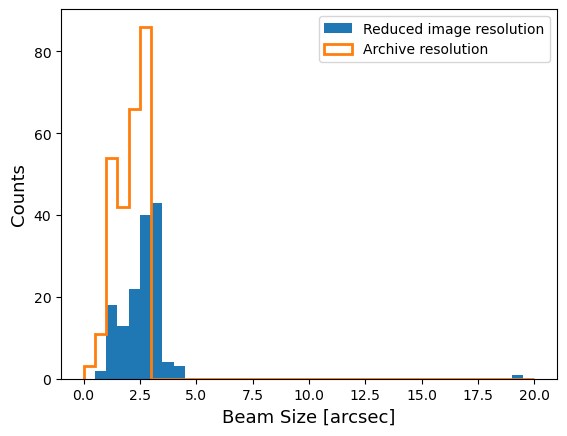

In [22]:
plt.figure()
plt.hist(beam_sizes, bins = 40, range = [0,20], label = 'Reduced image resolution')
plt.hist(res_sample, bins = 40, range = [0,20], histtype = 'step', lw = 2, label = 'Archive resolution')
plt.xlabel('Beam Size [arcsec]', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)
plt.legend()
plt.show()

587731511545233578
'resolution' from archive:  1.7450853432403626
'BMAJ' from header:  1.91962841937336


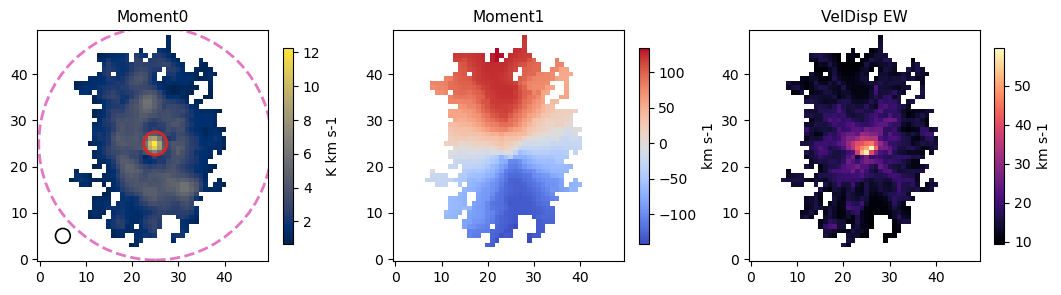

log(MH2) =  9.04993 +/-  0.00238
log(MH2) (inner) =  7.78963 +/-  0.00599
log(MH2) (outer) =  9.02540 +/-  0.00163
log(MH2) (inner+outer) =  9.04993


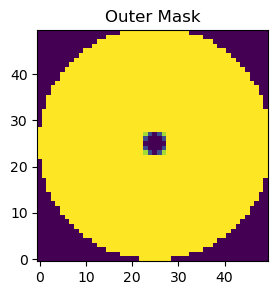

NameError: name 'demo_moments_on_image_centering' is not defined

In [46]:
# wipe file
out = open('/arc/projects/salvage/ALMA_reduction/gas_masses_Jun18.txt', 'w')
out.write('#objID M_H2 M_H2_err M_H2_inner M_H2_inner_err M_H2_outer M_H2_outer_err\n')
out.close()

rerun_targets = ['587731513153159199', '587731511545233578', '587732053236384121', '588017992295972989']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    if ID not in rerun_targets:
        continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'

    try:
        demo_PHANGS_moments_annuli(imagename, Z, 2*R, ID)
    except:
        print('failed moment')

    #view_image(Z, ID)

    #try:
    demo_moments_on_image_centering(imagename, Z, ID, 2*R, RA, DEC)
    #except:
    #    print('failed image')

In [24]:
#Query MySQL for SDSS ancillary data

db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec, u.petroR50_r, u.total_sfr_med, u.fiber_mass_med, u.fiber_sfr_med FROM  dr7_uberuber u WHERE u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id = np.array(db_data, dtype = str).T[0]

ra_sdss = data[1]
dec_sdss = data[2]
mass_sdss = data[3]
z_sdss = data[4]
rpetro_sdss = data[5]
sfr_sdss = data[6]
fib_mass_sdss = data[7]
fib_sfr_sdss = data[8]

# match to salvage products
objID_gas = np.loadtxt('/arc/projects/salvage/ALMA_reduction/salvage-AGN-July17-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out', unpack = True, usecols = [0], dtype = 'str')
M_H2, M_H2_err, M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err, M_H2_inner_stacked, M_H2_outer_stacked = np.loadtxt('/arc/projects/salvage/ALMA_reduction/salvage-AGN-July17-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out', unpack = True, usecols = [1,2,3,4,5,6,7,8])
match, table_idx, gas_idx = np.intersect1d(table_id, objID_gas, return_indices = True)
print(len(match))

# higher order salvage products
fgas_inner = 10**M_H2_inner[gas_idx] / 10**fib_mass_sdss[table_idx]
fgas_outer = 10**M_H2_outer[gas_idx] / (10**mass_sdss[table_idx] - 10**fib_mass_sdss[table_idx])
fgas_grad = fgas_inner/ fgas_outer

66


/tmp/ipykernel_79/631921127.py:33: RuntimeWarning: invalid value encountered in divide
  fgas_grad = fgas_inner/ fgas_outer


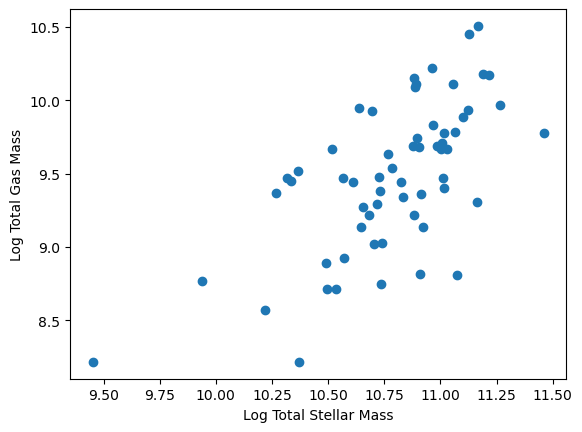

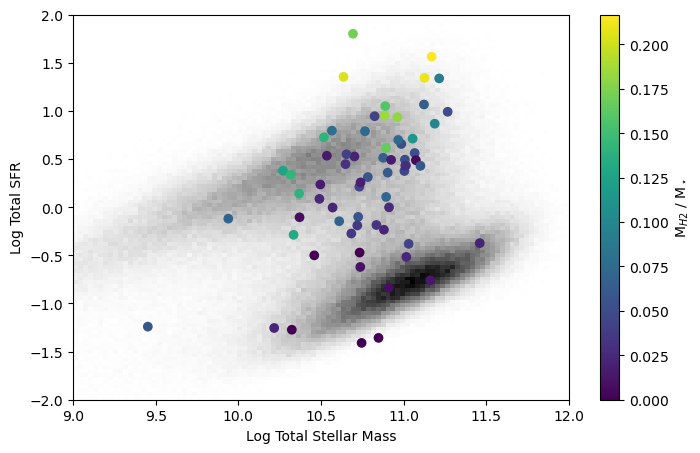

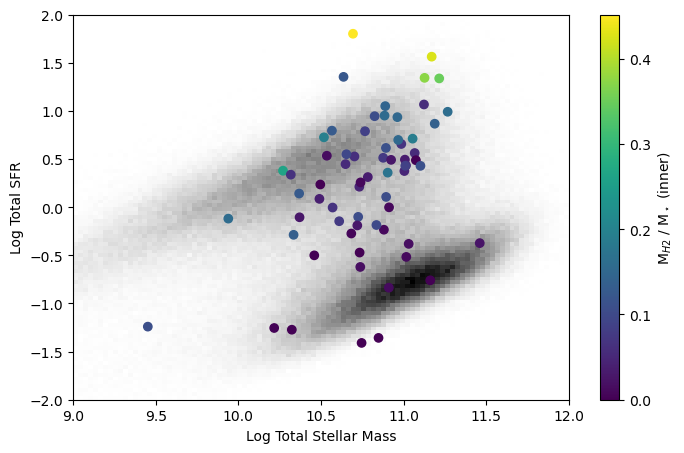

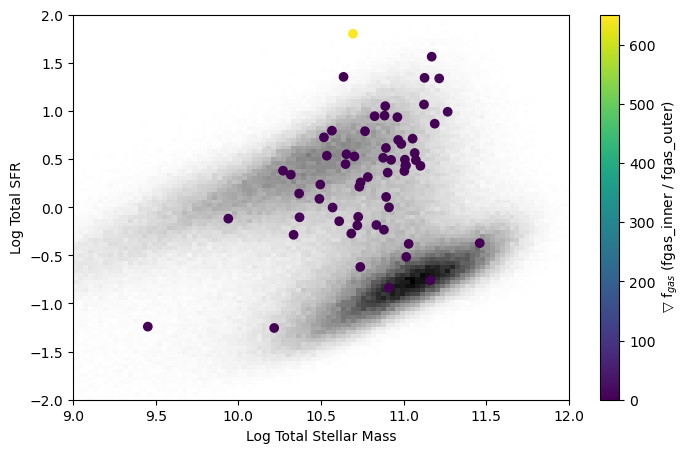

In [25]:
plt.figure()
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx])
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.show()

plt.figure(figsize = (8,5))
plt.hist2d(mass_sdss, sfr_sdss, cmap='gray_r', range = [[9,12], [-2,2]], bins = 100)
plt.scatter(mass_sdss[table_idx], sfr_sdss[table_idx], c = 10**M_H2[gas_idx] / 10**mass_sdss[table_idx])
plt.colorbar(label = 'M$_{H2}$ / M$_\star$')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total SFR')
plt.show()

plt.figure(figsize = (8,5))
plt.hist2d(mass_sdss, sfr_sdss, cmap='gray_r', range = [[9,12], [-2,2]], bins = 100)
plt.scatter(mass_sdss[table_idx], sfr_sdss[table_idx], c = fgas_inner)
plt.colorbar(label = 'M$_{H2}$ / M$_\star$ (inner)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total SFR')
plt.show()

plt.figure(figsize = (8,5))
plt.hist2d(mass_sdss, sfr_sdss, cmap='gray_r', range = [[9,12], [-2,2]], bins = 100)
plt.scatter(mass_sdss[table_idx], sfr_sdss[table_idx], c = fgas_grad)
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total SFR')
plt.show()

In [11]:
#Query MySQL for SDSS and xCOLD GASS ancillary data

db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec, u.petroR50_r, u.total_sfr_med, u.fiber_mass_med, u.fiber_sfr_med, x.LogMH2, x.LogMH2_lim FROM dr7_uberuber u, xCOLDGASS x WHERE u.objID=x.objID AND u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id_xcg = np.array(db_data, dtype = str).T[0]

ra_xcg = data[1]
dec_xcg = data[2]
mass_xcg = data[3]
z_xcg = data[4]
rpetro_xcg = data[5]
sfr_xcg = data[6]
fib_mass_xcg = data[7]
fib_sfr_xcg = data[8]
M_H2_xcg = data[9]
M_H2_lim_xcg = data[10]

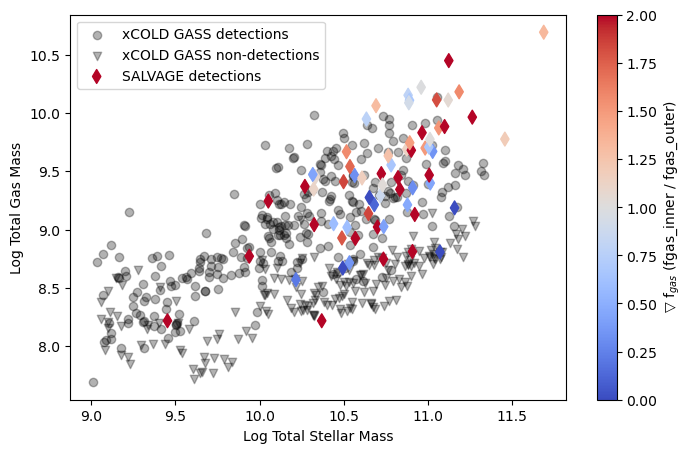

In [12]:
plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

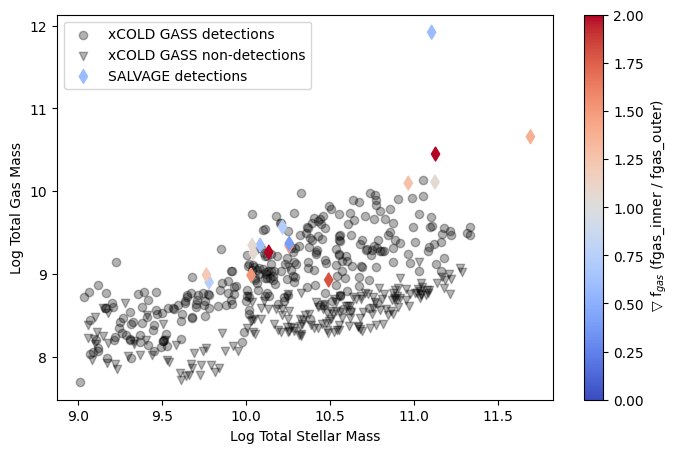

In [121]:
plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

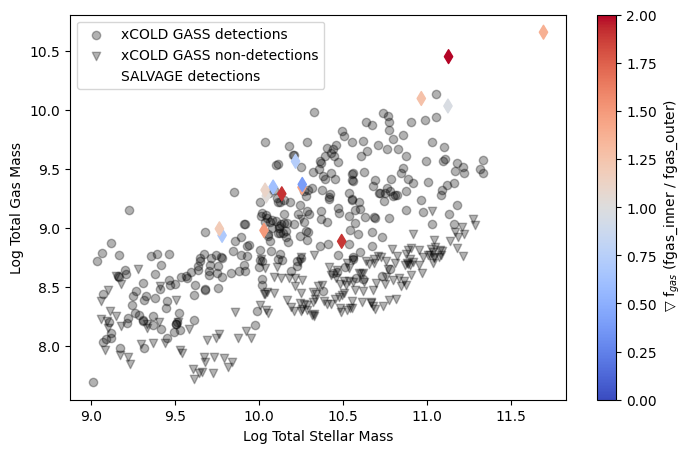

In [89]:
plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

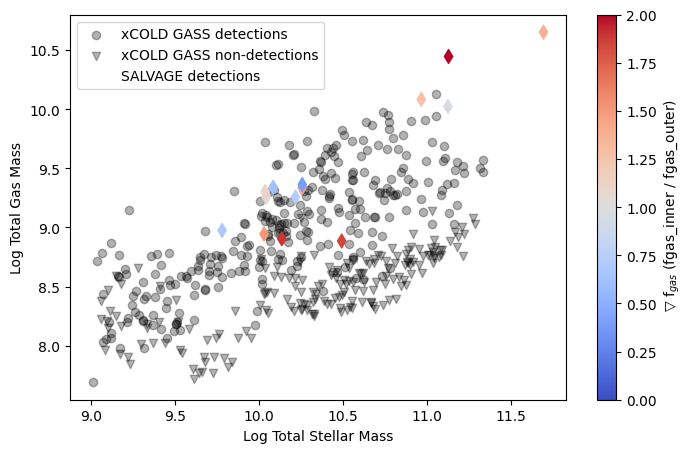

In [68]:
# when more strict masks are used ... (3 channels for low-SNR mask)

plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

In [129]:
match, idx_sdss, idx_xcg = np.intersect1d(table_id[table_idx],table_id_xcg, return_indices = True)

In [74]:
M_H2_xcg[idx_xcg] - M_H2[gas_idx][idx_sdss]

array([-0.15088169])

In [131]:
print(table_id_xcg[idx_xcg], objID_gas[gas_idx][idx_sdss])

['587727221402042402'] ['587727221402042402']


In [130]:
M_H2_xcg[idx_xcg] - M_H2[gas_idx][idx_sdss]

array([-0.14659128])